# Plotting Austrian Data I collected for the report

### Presettings

In [1]:
import os
import re

import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from scipy import stats

In [2]:
# All directories
root       = "C:/Users/freiste/OneDrive - Ilmatieteen laitos/Documents/IIASA YSSP 2023"
this_dir   =  os.getcwd()

input_dir  = f"{root}/02 - Data/AUT"
output_dir = f"{input_dir}/Figures"

In [3]:
indexes = ['ForestryDistrict', 'FederalState', 'Year']

bundesländer = {'Burgenland'       : 'Burgenland_total'  ,
                'Kärnten'          : 'Carinthia_total'   ,
                'Carinthia'        : 'Carinthia_total'   ,
                'Niederösterreich' : 'LowerAustria_total', 
                'LowerAustria'     : 'LowerAustria_total', 
                'Oberösterreich'   : 'UpperAustria_total', 
                'UpperAustria'     : 'UpperAustria_total', 
                'Salzburg'         : 'Salzburg_total'    , 
                'Steiermark'       : 'Styria_total'      , 
                'Styria'           : 'Styria_total'      , 
                'Tirol'            : 'Tyrol_total'       , 
                'Tyrol'            : 'Tyrol_total'       , 
                'Vorarlberg'       : 'Vorarlberg_total'  }

# Paper Idea

What if we do this kind of Climate Change Attribution study that Joonas plans right now, just for Austria? 
HCLIM simulations can be done by Laura, she can be second author.
She can also make different global warming level runs and tell how much of it all is caused by warming and how much worse it could get with warming (when is the peak with different warming levels)

# Data Magic

In [4]:
# Exclude Totals
def exclude_totals(aut, all=False):
    if all==True:
        aut = aut[~aut.FederalState.isin(bundesländer.values())]
        print(aut.FederalState.unique())
    
    else:
        old = aut[aut.Year.isin(np.arange(1988,2003))]
        new = aut[aut.Year.isin(np.arange(2003,2023))]
        
        new = new[~new.FederalState.isin(bundesländer.values())]  # only for everything before 2003
        
        aut = pd.concat([old,new])
        
    return aut


In [5]:
# IMPORT DATA
aut = pd.read_csv(f'{input_dir}/Data_Merged_NaNcleared.csv')
aut.drop(columns=['Unnamed: 0'], inplace=True)
aut = exclude_totals(aut, all=False)
aut

,ForestryDistrict,FederalState,lat_center,lon_center,Year,degreedays,relevant_degreedays,max_generations,season_start,season_end,...,SpruceShareTotalForest,SpruceConifShare,SpruceArea,SpruceArea2,SpruceStockShare,SpruceStock,DWStShare,DWStStock,storm_salvage_1,bb_damage_mean
140,Burgenland,Burgenland_total,47.500000,16.416667,1988,3142.830811,1589.690063,2.854022,127,219,...,0.152672,0.377358,20000.000000,0.0,0.314279,5219000.0,0.023,6.800000,0.0,9536.42400
141,Burgenland,Burgenland_total,47.500000,16.416667,1989,3101.209717,1503.780151,2.699785,127,219,...,0.152672,0.377358,20000.000000,0.0,0.314279,5219000.0,0.023,6.800000,0.0,6973.51005
142,Burgenland,Burgenland_total,47.500000,16.416667,1990,3069.578369,1560.409912,2.801454,127,219,...,0.152672,0.377358,20000.000000,0.0,0.314279,5219000.0,0.023,6.800000,0.0,6973.51005
143,Burgenland,Burgenland_total,47.500000,16.416667,1991,2998.039551,1508.559814,2.708366,127,219,...,0.152672,0.377358,20000.000000,0.0,0.314279,5219000.0,0.023,6.800000,0.0,6973.51005
144,Burgenland,Burgenland_total,47.500000,16.416667,1992,3361.189941,1680.440186,3.016948,127,219,...,0.152672,0.377358,20000.000000,0.0,0.314279,5219000.0,0.023,6.800000,0.0,34867.55025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,Feldkirch,Vorarlberg,47.257412,9.664555,2018,3456.260010,1687.459717,3.029551,128,219,...,0.438205,0.666667,5553.033638,1005.0,0.725265,1876000.0,0.018,7.800000,62340.0,13189.20000
1743,Feldkirch,Vorarlberg,47.257412,9.664555,2019,3152.130371,1586.679932,2.848618,128,219,...,0.449857,0.666667,5725.592931,670.0,0.725265,1876000.0,0.018,7.433333,12546.0,30910.80000
1744,Feldkirch,Vorarlberg,47.257412,9.664555,2020,3144.560303,1495.789673,2.685439,128,219,...,0.461510,0.666667,5898.152225,335.0,0.725265,1876000.0,0.018,7.066667,22042.0,22798.80000
1745,Feldkirch,Vorarlberg,47.257412,9.664555,2021,2910.789795,1472.299927,2.643267,128,219,...,0.461510,0.666667,5898.152225,0.0,0.725265,1876000.0,0.018,7.066667,3849.0,13773.60000


In [497]:
aut.columns

Index(['ForestryDistrict', 'FederalState', 'lat_center', 'lon_center', 'Year',
       'degreedays', 'relevant_degreedays', 'max_generations', 'season_start',
       'season_end', 'season_length', 'frostdays', 'Humavg_5', 'Humavg_6',
       'Humavg_7', 'Humavg_8', 'Humavg_JJA', 'Precipavg_5', 'Precipavg_6',
       'Precipavg_7', 'Precipavg_8', 'Precipavg_JJA', 'Tavg_5', 'Tavg_6',
       'Tavg_7', 'Tavg_8', 'Tavg_JJA', 'Tmaxavg_5', 'Tmaxavg_6', 'Tmaxavg_7',
       'Tmaxavg_8', 'Tmaxavg_JJA', 'Tminavg_5', 'Tminavg_6', 'Tminavg_7',
       'Tminavg_8', 'Tminavg_JJA', 'Windspavg_5', 'Windspavg_6', 'Windspavg_7',
       'Windspavg_8', 'Windspavg_JJA', 'Area', 'DistrictShareAustrForest',
       'DistrictShareStateForest', 'TotalForestShare', 'TotalForestArea',
       'ConiferousShare', 'ConiferousArea', 'ConiferousStock',
       'SpruceShareTotalArea', 'SpruceShareTotalForest', 'SpruceConifShare',
       'SpruceArea', 'SpruceArea2', 'SpruceStockShare', 'SpruceStock',
       'DWStShare', 'DWStS

In [580]:
# Area of Federal States

# the "_total" have the correct area!!
area = aut.groupby('FederalState').mean('Area').Area
area = area.loc[bundesländer.values()].drop_duplicates().reset_index()
area.replace(bundesländer.values(), bundesländer.keys(), inplace=True)

## Damage Data (Beatles & Storm)

In [7]:
bbeat_dam = aut.groupby('Year').sum('bb_damage_mean').bb_damage_mean
storm_dam = aut.groupby('Year').sum('storm_salvage_1').storm_salvage_1

# storm damaged wood left in the forest (assuming minimum 20% are left in the forest, which is also the threshold for bb outbreak management)
taken = 0.75
storm_dam_left = storm_dam/taken * (1-taken)

# storm damage allocated to previous year(s) to be better comparable to bb damage
year_shift      = 1
storm_dam1      = pd.Series(storm_dam.values , index=storm_dam.index + year_shift)
storm_dam_left1 = pd.Series(storm_dam_left.values , index=storm_dam_left.index + year_shift)


In [8]:
# Remove outliers (or what I think are outliers judging from the figures)
storm_dam_left_outl = storm_dam_left.loc[(storm_dam_left.values < 2.5*10**6) & (storm_dam_left.values > 0)]
bbeat_dam_outl = bbeat_dam.loc[storm_dam_left_outl.index]
bbeat_dam_outl = bbeat_dam_outl.loc[bbeat_dam_outl.values > 2.5 * 10**6]

storm_dam_left_outl1 = pd.Series(storm_dam_left_outl.values, index=storm_dam_left_outl.index + year_shift)

In [17]:
bb_outliers = bbeat_dam[~bbeat_dam.index.isin(bbeat_dam_outl.index)]
bb_outliers = bb_outliers.loc[bb_outliers.index > 2002]   # because storm salvage data starts only at 2003

storm_outliers = storm_dam_left.loc[bb_outliers.index]

In [419]:
bb_dam_distr = aut.groupby(['ForestryDistrict','Year']).sum('bb_damage_mean').bb_damage_mean
bb_dam_state = aut.groupby(['FederalState','Year']).sum('bb_damage_mean').bb_damage_mean


## Forest Structure

In [9]:
tot_area = aut.groupby('Year').sum('TotalForestArea').TotalForestArea
con_area = aut.groupby('Year').sum('ConiferousArea').ConiferousArea
spr_area = aut.groupby('Year').sum('SpruceArea').SpruceArea

con_share = con_area.divide(tot_area, fill_value=0)*100 
spr_share = spr_area.divide(con_area, fill_value=0)*100 

In [595]:
spr_tot_area_share = aut[indexes+['SpruceArea']].groupby(['FederalState', 'Year']).sum('SpruceArea').reset_index()
spr_tot_area_share.replace(bundesländer.values(), bundesländer.keys(), inplace=True)
spr_tot_area_share = spr_tot_area_share.sort_values(by=['FederalState', 'Year'])

spr_tot_area_share = spr_tot_area_share.merge(area, left_on='FederalState', right_on='FederalState')
spr_tot_area_share['spruce/ha'] = (spr_tot_area_share.SpruceArea / spr_tot_area_share.Area) *100


## Degreedays

In [10]:
degreedays = aut.groupby('Year').mean('degreedays').degreedays

rel_degreedays = aut.groupby('Year').mean('relevant_degreedays').relevant_degreedays

## Temperatures

In [11]:
# Average temperature of the month
tavg_may = aut.groupby('Year').mean('Tavg_5').Tavg_5
tavg_jun = aut.groupby('Year').mean('Tavg_6').Tavg_6
tavg_jul = aut.groupby('Year').mean('Tavg_7').Tavg_7
tavg_aug = aut.groupby('Year').mean('Tavg_8').Tavg_8

# Average max & min temperature in the month
tmaxavg_may = aut.groupby('Year').mean('Tmaxavg_5').Tmaxavg_5
tmaxavg_jun = aut.groupby('Year').mean('Tmaxavg_6').Tmaxavg_6
tmaxavg_jul = aut.groupby('Year').mean('Tmaxavg_7').Tmaxavg_7
tmaxavg_aug = aut.groupby('Year').mean('Tmaxavg_8').Tmaxavg_8

tminavg_may = aut.groupby('Year').mean('Tminavg_5').Tminavg_5
tminavg_jun = aut.groupby('Year').mean('Tminavg_6').Tminavg_6
tminavg_jul = aut.groupby('Year').mean('Tminavg_7').Tminavg_7
tminavg_aug = aut.groupby('Year').mean('Tminavg_8').Tminavg_8


# Average temperature in the summer
tavg_jja    = aut.groupby('Year').mean('Tavg_JJA').Tavg_JJA
tmaxavg_jja = aut.groupby('Year').mean('Tmaxavg_JJA').Tmaxavg_JJA
tminavg_jja = aut.groupby('Year').mean('Tminavg_JJA').Tminavg_JJA

## Wind, Rain, etc.

In [509]:
aut.columns

Index(['ForestryDistrict', 'FederalState', 'lat_center', 'lon_center', 'Year',
       'degreedays', 'relevant_degreedays', 'max_generations', 'season_start',
       'season_end', 'season_length', 'frostdays', 'Humavg_5', 'Humavg_6',
       'Humavg_7', 'Humavg_8', 'Humavg_JJA', 'Precipavg_5', 'Precipavg_6',
       'Precipavg_7', 'Precipavg_8', 'Precipavg_JJA', 'Tavg_5', 'Tavg_6',
       'Tavg_7', 'Tavg_8', 'Tavg_JJA', 'Tmaxavg_5', 'Tmaxavg_6', 'Tmaxavg_7',
       'Tmaxavg_8', 'Tmaxavg_JJA', 'Tminavg_5', 'Tminavg_6', 'Tminavg_7',
       'Tminavg_8', 'Tminavg_JJA', 'Windspavg_5', 'Windspavg_6', 'Windspavg_7',
       'Windspavg_8', 'Windspavg_JJA', 'Area', 'DistrictShareAustrForest',
       'DistrictShareStateForest', 'TotalForestShare', 'TotalForestArea',
       'ConiferousShare', 'ConiferousArea', 'ConiferousStock',
       'SpruceShareTotalArea', 'SpruceShareTotalForest', 'SpruceConifShare',
       'SpruceArea', 'SpruceArea2', 'SpruceStockShare', 'SpruceStock',
       'DWStShare', 'DWStS

In [510]:
wind_jja   = aut.groupby('Year').mean('Windspavg_JJA').Windspavg_JJA
precip_jja = aut.groupby('Year').sum('Precipavg_JJA').Precipavg_JJA
frost      = aut.groupby('Year').mean('frostdays').frostdays
hum_jja    = aut.groupby('Year').mean('Humavg_JJA').Humavg_JJA

# Format

In [12]:
# Formats
bbcol = 'tab:orange'
stcol = 'tab:blue'
spcol = 'darkgreen'
tpcol = 'crimson'


# Basic Plots

## BB Damage

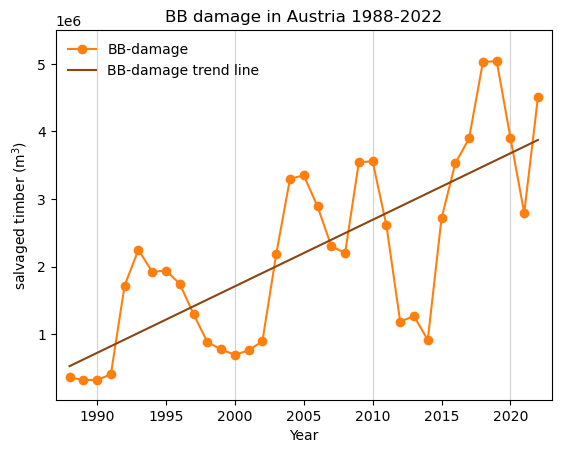

In [462]:
# Bark beetle Damage in Austria

#calculate equation for trendline
x = list(bbeat_dam.index)
y = bbeat_dam.values
bb_dam_trend   = np.polyfit(x, y, 1)
bb_dam_trend_line = np.poly1d(bb_dam_trend)

plt.vlines([1990,2000,2010,2020], 0, 5.5e+6, linewidth=0.8, color='lightgray')
bbeat_dam.plot(marker='o', label='BB-damage', color=bbcol)
#add trendline to plot
plt.plot(x, bb_dam_trend_line(x), label="BB-damage trend line", color='saddlebrown')

plt.title('BB damage in Austria 1988-2022')
plt.xlim(1987,2023)
plt.ylim(3e+4, 5.5e6)
plt.ylabel('salvaged timber (m$^3$)')
plt.legend(frameon=False)

Separate it into good and bad BB years for estimating the damage later (and maybe do better other regressions)

In [24]:
# Everthing above the trend line is a "good year", everything below a "bad bb year"
bb_goodyrs = []
bb_badyrs  = []

for yr in np.arange(1988,2022,1):
    
    if yr <= 2003:
        mod = bb_dam_trend_line(yr)
    else:
        mod = bb_dam_trend_line(yr)


    if bbeat_dam.loc[yr] - mod > 0:
        bb_goodyrs.append(yr)
    elif bbeat_dam.loc[yr] - mod < 0:
        bb_badyrs.append(yr)
    else:
        bb_goodyrs.append(yr)
    


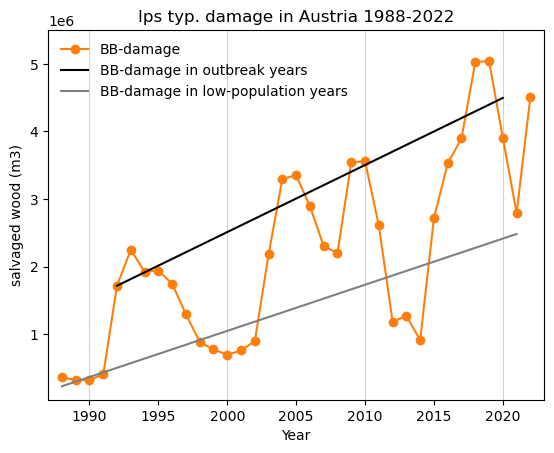

In [464]:
# Bark beetle Damage in Austria

bb_dam_goodyrs = bbeat_dam.loc[bb_goodyrs]
bb_dam_badyrs  = bbeat_dam.loc[bb_badyrs]

# Model 1
x_gd = list(bb_dam_goodyrs.index)
y_gd = bb_dam_goodyrs.values
model_gd   = np.polyfit(x_gd, y_gd, 1)
predict_gd = np.poly1d(model_gd)

# Model 2
x_bd = list(bb_dam_badyrs.index)
y_bd = bb_dam_badyrs.values
model_bd   = np.polyfit(x_bd, y_bd, 1)
predict_bd = np.poly1d(model_bd)

plt.vlines([1990,2000,2010,2020], 0, 5.5e+6, linewidth=0.8, color='lightgray')
bbeat_dam.plot(marker='o', label='BB-damage', color=bbcol)
#add trendlines to plot
plt.plot(x_gd, predict_gd(x_gd), label="BB-damage in outbreak years", color='k')
plt.plot(x_bd, predict_bd(x_bd), label="BB-damage in low-population years", color='grey')

plt.title('Ips typ. damage in Austria 1988-2022')
plt.xlim(1987,2023)
plt.ylim(3e+4, 5.5e6)
plt.ylabel('salvaged wood (m3)')
plt.legend(frameon=False)

In [ ]:
bb_dam_state = bb_dam_state.reset_index()
bb_dam_state['FederalState'].replace(bundesländer.values(),bundesländer.keys(), inplace=True)

Text(0, 0.5, 'salvaged timber (m$^3$)')

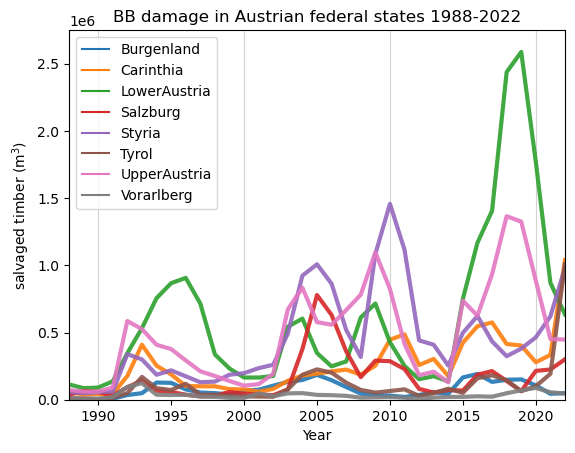

In [521]:
# BB damage in Bundesländern

x   = bb_dam_state.Year
y   = bb_dam_state.bb_damage_mean
hue = bb_dam_state.FederalState  

plt.vlines([1990,2000,2010,2020], 0, 3e+6, linewidth=0.8, color='lightgray')
sns.lineplot(x=x, y=y, hue=hue, linewidth=3, alpha=0.9)

plt.legend(loc='upper left')  # bbox_to_anchor=(1.02, 0.7)
plt.xlim(1988,2022)
plt.ylim(0,2.75e+6)
plt.title('BB damage in Austrian federal states 1988-2022')
plt.ylabel('salvaged timber (m$^3$)')

In [522]:
aut.columns

Index(['ForestryDistrict', 'FederalState', 'lat_center', 'lon_center', 'Year',
       'degreedays', 'relevant_degreedays', 'max_generations', 'season_start',
       'season_end', 'season_length', 'frostdays', 'Humavg_5', 'Humavg_6',
       'Humavg_7', 'Humavg_8', 'Humavg_JJA', 'Precipavg_5', 'Precipavg_6',
       'Precipavg_7', 'Precipavg_8', 'Precipavg_JJA', 'Tavg_5', 'Tavg_6',
       'Tavg_7', 'Tavg_8', 'Tavg_JJA', 'Tmaxavg_5', 'Tmaxavg_6', 'Tmaxavg_7',
       'Tmaxavg_8', 'Tmaxavg_JJA', 'Tminavg_5', 'Tminavg_6', 'Tminavg_7',
       'Tminavg_8', 'Tminavg_JJA', 'Windspavg_5', 'Windspavg_6', 'Windspavg_7',
       'Windspavg_8', 'Windspavg_JJA', 'Area', 'DistrictShareAustrForest',
       'DistrictShareStateForest', 'TotalForestShare', 'TotalForestArea',
       'ConiferousShare', 'ConiferousArea', 'ConiferousStock',
       'SpruceShareTotalArea', 'SpruceShareTotalForest', 'SpruceConifShare',
       'SpruceArea', 'SpruceArea2', 'SpruceStockShare', 'SpruceStock',
       'DWStShare', 'DWStS

In [550]:
# damage per ha per year

bb_dam_state2 = bb_dam_state.merge(area, left_on='FederalState', right_on='FederalState')
bb_dam_state2['damage/ha'] = bb_dam_state2.bb_damage_mean / bb_dam_state2.Area
bb_dam_state2

,FederalState,Year,bb_damage_mean,Area,damage/ha
0,Burgenland,2003,132766.80000,396520.0,0.334830
1,Burgenland,2004,146864.40000,396520.0,0.370383
2,Burgenland,2005,184741.20000,396520.0,0.465906
3,Burgenland,2006,145200.00000,396520.0,0.366186
4,Burgenland,2007,94656.00000,396520.0,0.238717
...,...,...,...,...,...
275,Vorarlberg,1998,20920.53015,260167.0,0.080412
276,Vorarlberg,1999,13947.02010,260167.0,0.053608
277,Vorarlberg,2000,13947.02010,260167.0,0.053608
278,Vorarlberg,2001,46490.06583,260167.0,0.178693


Text(0, 0.5, 'salvaged timber / area   (m$^3$ / ha)')

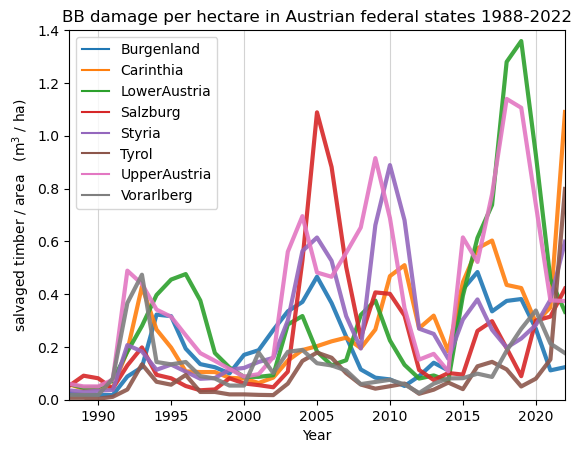

In [565]:
x   = bb_dam_state2.Year
y   = bb_dam_state2['damage/ha']
hue = bb_dam_state2.FederalState  

plt.vlines([1990,2000,2010,2020], 0, 1.4, linewidth=0.8, color='lightgray')
sns.lineplot(x=x, y=y, hue=hue, linewidth=3, alpha=0.9)

plt.legend(loc='upper left')
plt.xlim(1988,2022)
plt.ylim(0,1.4)
plt.title('BB damage per hectare in Austrian federal states 1988-2022')
plt.ylabel('salvaged timber / area   (m$^3$ / ha)')

## Storm Damage

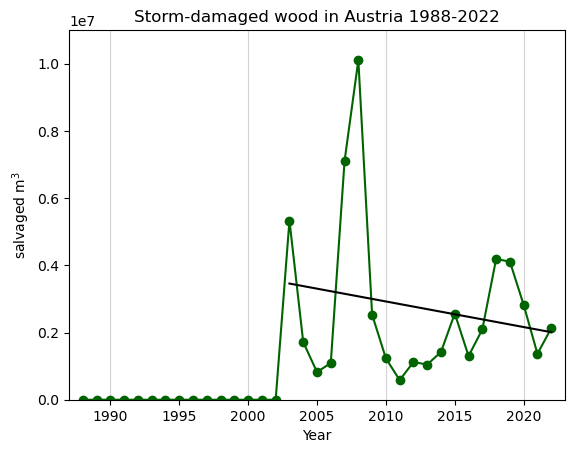

In [508]:

# Wind changes in Austria
plt.vlines([1990,2000,2010,2020], 0, 1.2e+7, linewidth=0.8, color='lightgray')
storm_dam.plot(marker='o', color=spcol, label='storm damaged wood')


plt.title('Storm-damaged wood in Austria 1988-2022')

plt.ylabel('salvaged m$^3$')
plt.xlim(1987,2023)
plt.ylim(0, 1.1e+7)
plt.xticks(np.arange(1990,2025,5))


#calculate equation for trendline
x = list(storm_dam.loc[2003:].index)
y = storm_dam.loc[2003:].values
storm_dam_trend   = np.polyfit(x, y, 1)
storm_dam_line = np.poly1d(storm_dam_trend)
#add trendline to plot
plt.plot(x, storm_dam_line(x), label="trend line", color='k')



## Forest

([<matplotlib.axis.XTick at 0x1d83c228950>,
 [Text(1990, 0, '1990'),
  Text(1995, 0, '1995'),
  Text(2000, 0, '2000'),
  Text(2005, 0, '2005'),
  Text(2010, 0, '2010'),
  Text(2015, 0, '2015'),
  Text(2020, 0, '2020')])

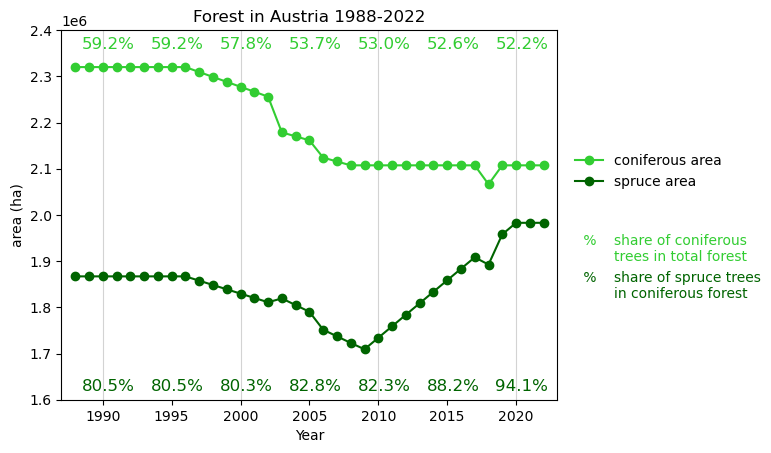

In [29]:
# Forest Structure in Austria

plt.vlines([1990,2000,2010,2020], 0,5e+7, linewidth=0.8, color='lightgray')
con_area.plot(marker='o', color='limegreen', label='coniferous area')
spr_area.plot(marker='o', color=spcol, label='spruce area')

# Shares
for y in np.arange(1990,2025,5):
    plt.text(y-1.5, 2.36e+6, f"{con_share[y]:.1f}%", color='limegreen', fontsize=12)
    plt.text(y-1.5, 1.62e+6, f"{spr_share[y]:.1f}%", color=spcol, fontsize=12)

plt.title('Forest in Austria 1988-2022')
plt.legend(edgecolor='white', facecolor='white', framealpha=1, bbox_to_anchor=(1.01, 0.7))
plt.text(2024.6, 1.9e+6, " %    share of coniferous\n        trees in total forest", color='limegreen', fontsize=10)
plt.text(2024.6, 1.82e+6, " %    share of spruce trees\n        in coniferous forest", color=spcol, fontsize=10)

plt.ylabel('area (ha)')
plt.xlim(1987,2023)
plt.ylim(1.6e+6, 2.4e+6)
plt.xticks(np.arange(1990,2025,5))


## Climate

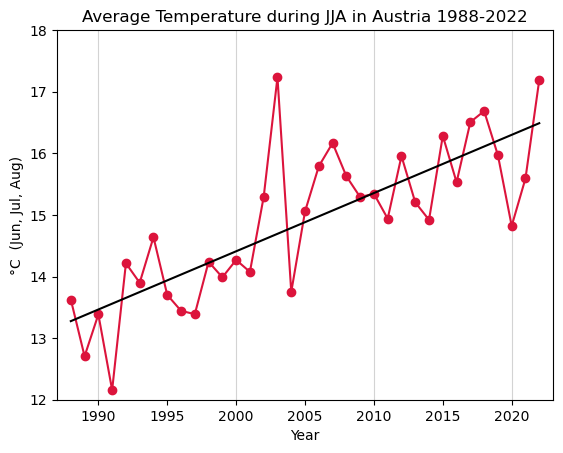

In [381]:
# Temperature changes in Austria
plt.vlines([1990,2000,2010,2020], 12,18, linewidth=0.8, color='lightgray')
tavg_jja.plot(marker='o', color=tpcol, label='Average temperature (JJA)')


plt.title('Average Temperature during JJA in Austria 1988-2022')

plt.ylabel('°C  (Jun, Jul, Aug)')
plt.xlim(1987,2023)
plt.ylim(12,18)
plt.xticks(np.arange(1990,2025,5))


#calculate equation for trendline
x = list(tavg_jja.index)
y = tavg_jja.values
tavg_jja_trend   = np.polyfit(x, y, 1)
tavg_jja_line = np.poly1d(tavg_jja_trend)
#add trendline to plot
plt.plot(x, tavg_jja_line(x), label="trend line", color='k')



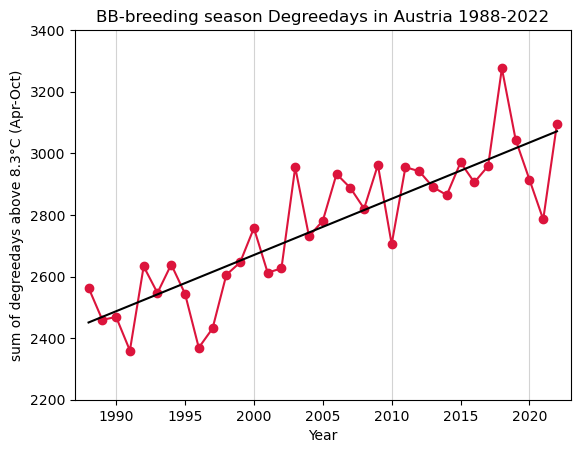

In [375]:
# Temperature changes in Austria


plt.vlines([1990,2000,2010,2020], 2200, 3400, linewidth=0.8, color='lightgray')
degreedays.plot(marker='o', color=tpcol, label='spruce area')


plt.title('Breeding season Degreedays in Austria 1988-2022')

plt.ylabel('sum of degreedays above 8.3°C (Apr-Oct)')
plt.xlim(1987,2023)
plt.ylim(2200, 3400)
plt.xticks(np.arange(1990,2025,5))


#calculate equation for trendline
x = list(degreedays.index)
y = degreedays.values
degreedays_trend   = np.polyfit(x, y, 1)
degreedays_line = np.poly1d(degreedays_trend)
#add trendline to plot
plt.plot(x, degreedays_line(x), label="trend line", color='k')



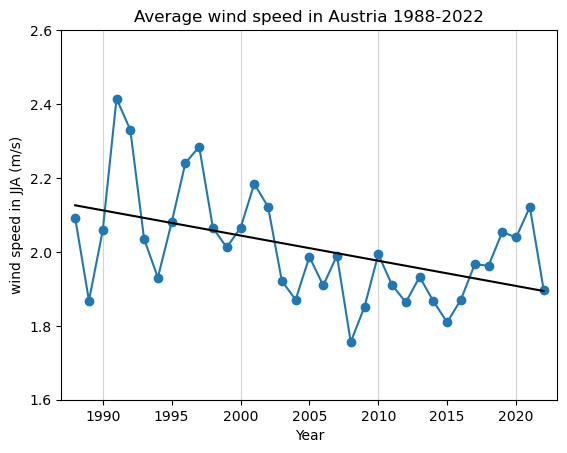

In [459]:
# Wind changes in Austria
plt.vlines([1990,2000,2010,2020], 0,5, linewidth=0.8, color='lightgray')
wind_jja.plot(marker='o', color=stcol, label='wind speed')


plt.title('Average wind speed in Austria 1988-2022')

plt.ylabel('wind speed in JJA (m/s)')
plt.xlim(1987,2023)
plt.ylim(1.6, 2.6)
plt.xticks(np.arange(1990,2025,5))


#calculate equation for trendline
x = list(wind_jja.index)
y = wind_jja.values
wind_jja_trend   = np.polyfit(x, y, 1)
wind_jja_line = np.poly1d(wind_jja_trend)
#add trendline to plot
plt.plot(x, wind_jja_line(x), label="trend line", color='k')



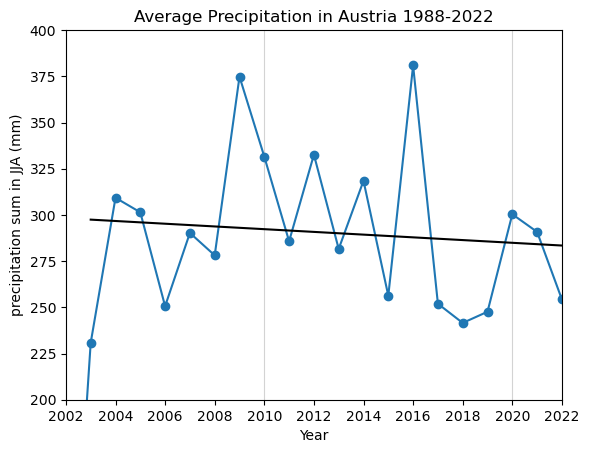

In [495]:
# Precipitation changes during summer

plt.vlines([1990,2000,2010,2020], 200, 400, linewidth=0.8, color='lightgray')
precip_jja.plot(marker='o', color=stcol, label='wind speed')


plt.title('Average Precipitation in Austria 1988-2022')

plt.ylabel('precipitation sum in JJA (mm)')
plt.xlim(2002,2022)
plt.ylim(200, 400)
plt.xticks(np.arange(2002,2024,2))


#calculate equation for trendline
x = list(precip_jja.loc[2003:].index)
y = precip_jja.loc[2003:].values
trend   = np.polyfit(x, y, 1)
line = np.poly1d(trend)
#add trendline to plot
plt.plot(x, line(x), label="trend line", color='k')



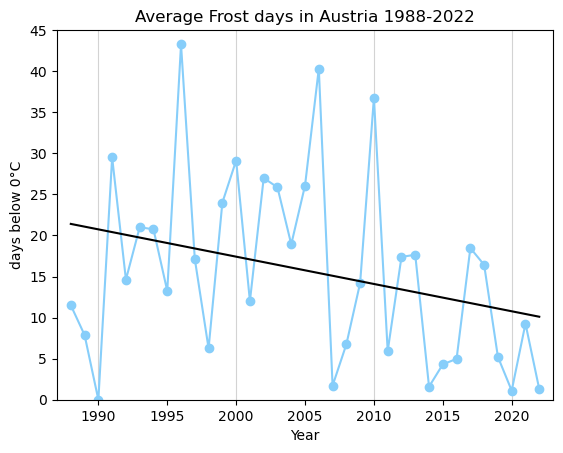

In [514]:
# Frost days

plt.vlines([1990,2000,2010,2020], 0, 45, linewidth=0.8, color='lightgray')
frost.plot(marker='o', color='lightskyblue')


plt.title('Average Frost days in Austria 1988-2022')

plt.ylabel('days below 0°C')
plt.xlim(1987,2023)
plt.ylim(0, 45)
#plt.xticks(np.arange(2002,2024,2))


#calculate equation for trendline
x = list(frost.index)
y = frost.values
trend   = np.polyfit(x, y, 1)
line = np.poly1d(trend)
#add trendline to plot
plt.plot(x, line(x), label="trend line", color='k')


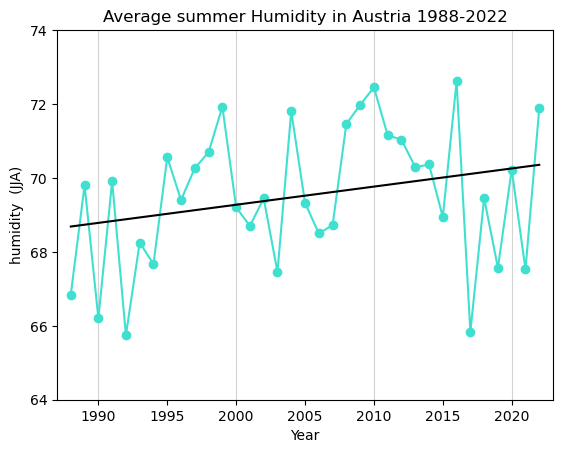

In [520]:
# Humidity

plt.vlines([1990,2000,2010,2020], 64, 74, linewidth=0.8, color='lightgray')
hum_jja.plot(marker='o', color='turquoise')


plt.title('Average summer Humidity in Austria 1988-2022')

plt.ylabel('humidity  (JJA)')
plt.xlim(1987,2023)
plt.ylim(64, 74)
#plt.xticks(np.arange(2002,2024,2))


#calculate equation for trendline
x = list(hum_jja.index)
y = hum_jja.values
trend   = np.polyfit(x, y, 1)
line = np.poly1d(trend)
#add trendline to plot
plt.plot(x, line(x), label="trend line", color='k')


## BB Indicators

(88.0, 95.0)

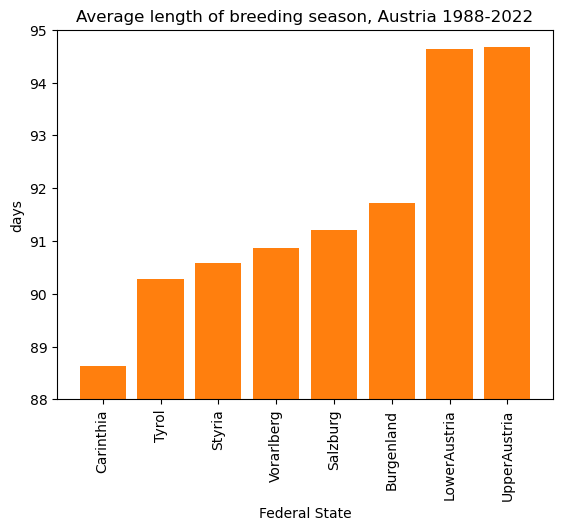

In [593]:
# Average length of breeding season per federal state

SL = aut.groupby('FederalState').mean('season_length').season_length.reset_index()


SL_post2003 = SL.loc[SL.index % 2 == 0].rename(columns={'season_length':'sl_post'})   # .set_index('FederalState').sort_values(by='season_length')
SL_pre2003  = SL.loc[SL.index % 2 == 1].rename(columns={'season_length':'sl_pre'})
SL_pre2003.loc[:,'FederalState'] = SL_pre2003['FederalState'].str.replace('_total','')

SL = SL_post2003.merge(SL_pre2003).set_index('FederalState')
sl_mean= SL.mean(axis=1).sort_values()

plt.bar(sl_mean.index, sl_mean.values, color=bbcol)
plt.title('Average length of breeding season, Austria 1988-2022')
plt.xlabel('Federal State')
plt.xticks(rotation=90)
plt.ylabel('days')
plt.ylim(88,95)


(0.0, 35.0)

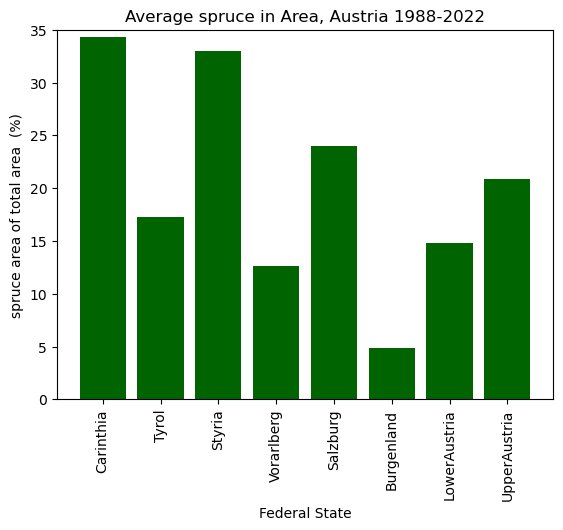

In [618]:
# Areal percentage of spruce

spr_per_ha = spr_tot_area_share.groupby(['FederalState']).mean('spruce/ha').reset_index()
spr_per_ha = spr_per_ha.set_index('FederalState').reindex(sl_mean.index)

plt.bar(spr_per_ha.index, spr_per_ha['spruce/ha'], color=spcol)
plt.title('Average spruce in Area, Austria 1988-2022')
plt.xlabel('Federal State')
plt.xticks(rotation=90)
plt.ylabel('spruce area of total area  (%)')
plt.ylim(0,35)


Text(0, 0.5, 'salvaged wood (m3)')

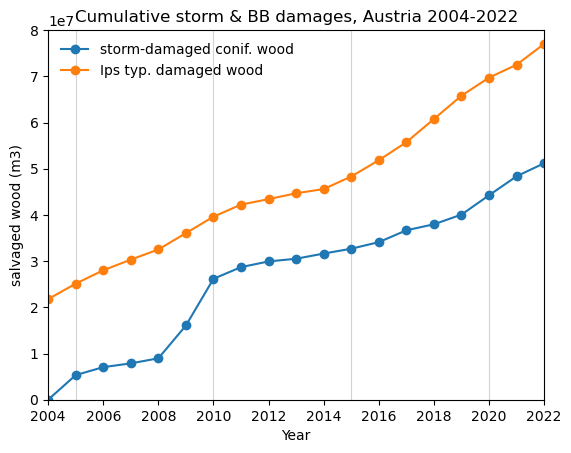

In [469]:
# Cumulative storm & bb damaged wood in Austria
storm_dam_cumsum = storm_dam.cumsum()
storm_dam_cumsum.index = storm_dam_cumsum.index+2

bb_dam_cumsum = bbeat_dam.cumsum()

plt.vlines([2005,2010,2015,2020], 0, 8.5e+7, linewidth=0.8, color='lightgray')
storm_dam_cumsum.plot(marker='o', label=f'storm-damaged conif. wood', color=stcol) 
bb_dam_cumsum.plot(marker='o', label='Ips typ. damaged wood', color=bbcol)

plt.title('Cumulative storm & BB damages, Austria 2004-2022')
plt.legend(frameon=False)
plt.xlim(2004, 2022)
plt.xticks(np.arange(2004,2024,2))
plt.ylim(0,8e+7)
plt.ylabel('salvaged wood (m3)')

# Regression 1:  Storm vs. BB damage

R2 = 0.61
 y = 1.7*x + 2488498.1


(500000.0, 5500000.0)

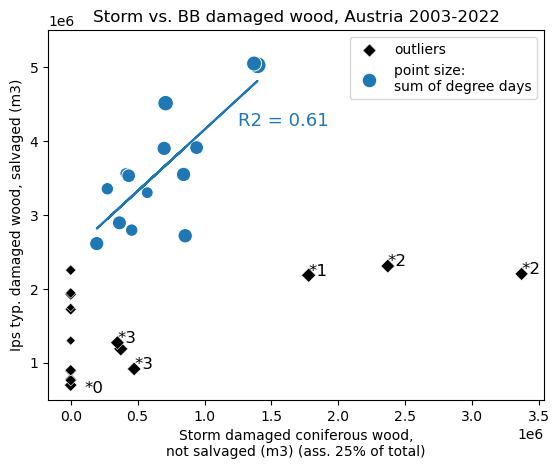

In [619]:
# Storm vs. BB damage REGRESSION
mixcol = stcol
outlcol = 'crimson'

# Make Regression model (time shift irrelevant here, because no time dimension included)
x = storm_dam_left.loc[storm_dam_left.values > 0]
x = x.loc[~x.index.isin(bb_outliers.index)]
y = bbeat_dam.loc[x.index]
model   = np.polyfit(x, y, 1)
predict = np.poly1d(model)


# Plot All Data  
sns.scatterplot(x=storm_dam_left, y=bbeat_dam, size=degreedays, color='k', marker='D',
                label= 'outliers', legend=False)

sns.scatterplot(x=x, y=y, size=degreedays, sizes=(20,150), color=stcol,
                label= 'point size:\nsum of degree days', legend=False)

plt.plot(x, predict(x), color=mixcol)


# Display R2 and equation
print(f"R2 = {r2_score(y, predict(x)):.2f}")
print(f" y = {model[0]:.1f}*x + {model[1]:.1f}")
plt.text(1.25 *10**6, 4.2 *10**6, f"R2 = {r2_score(y, predict(x)):.2f}", color=stcol, fontsize=13)


# Outlier descriptors
plt.text(0.1e+6, 0.6e+6, "*0", color='k', fontsize=12)
for ind in bb_outliers.index:      #  bb_outliers[bb_outliers.values > 4*10**6]
    if ind==2003:
        plt.text(storm_dam_left[ind] , bbeat_dam[ind], "*1", color='k', fontsize=12)
    elif ind>2012:
        plt.text(storm_dam_left[ind] , bbeat_dam[ind], "*3", color='k', fontsize=12)
    elif ind==2012:
        pass
    else:
        plt.text(storm_dam_left[ind] , bbeat_dam[ind], "*2", color='k', fontsize=12)
        

plt.title('Storm vs. BB damaged wood, Austria 2003-2022')
plt.legend(frameon=True, loc='upper right')
plt.xlabel('Storm damaged coniferous wood,\nnot salvaged (m3) (ass. 25% of total)')
#plt.xlim(0.1*10**6, 3.5*10**6)
#plt.xticks([0.1]+list(np.arange(0.5 *10**6, 4*10**6, 0.5 *10**6)))
plt.ylabel('Ips typ. damaged wood, salvaged (m3)')
plt.ylim(5e+5, 5.5e+6)
#plt.yticks(np.arange(5e+5, 5.5e+6))


*0 no data available

*1 first bad otbreak of the history with (at the time) record-high storm-damaged wood and degreedays, which caused a new normal and established a higher baseline population

*2 outbreak collapse?

*3 much less dead wood available, intensified mgmt after another record-high outbreak?

Interestingly, a lot of storm-damaged wood does not automatically mean high BB damage. This is because there is missing information on the standing storm-damaged wood. A high amount of storm-damaged wood salvage could mean that almost everything was taken out of the forest and that's why the BB populations were low. On years, where there is comparably low salvage, it could mean that there was a major storm, but the damaged wood is in a place where it cannot easily be salvaged, and therefore the damages are high.

In [620]:
# Storm vs. BB damage REGRESSION

# Create above and below trend line x and y containers parallelly
x = cut_zeros(*cutoff_trend_line(storm_dam_left))   # x_gd, x_bd
y = cutoff_trend_line(bbeat_dam)                    # y_gd, y_bd
r = create_split_model(x,y)


# Plot All Data  
sns.scatterplot(x=x_gd, y=y_gd, size=degreedays, sizes=(10,100), color='r',
                label= 'good years, point size:\nsum of degree days', legend=False)
sns.scatterplot(x=x_bd, y=y_bd, size=degreedays, sizes=(10,100), color=stcol,
                label= 'bad years, point size:\nsum of degree days', legend=False)

plt.plot(x_gd, predict_gd(x_gd), color='r')
plt.plot(x_bd, predict_bd(x_bd), color=mixcol)

# Display R2
plt.text(1.5e+6, 3.5e+6, f"R2 = {r[0]:.2f}", color='r', fontsize=13)
plt.text(2.5e+6, 1.8e+6, f"R2 = {r[1]:.2f}", color=stcol, fontsize=13)


plt.title('Storm vs. BB damaged wood, Austria 2003-2022')
plt.legend(frameon=True, loc='upper right')
plt.xlabel('Storm damaged coniferous wood,\nnot salvaged (m3) (ass. 25% of total)')
#plt.xlim(0.1*10**6, 3.5*10**6)
#plt.xticks([0.1]+list(np.arange(0.5 *10**6, 4*10**6, 0.5 *10**6)))
plt.ylabel('Ips typ. damaged wood, salvaged (m3)')
#plt.ylim(0, 0.5*10**6)


returns (over, under) trend line
returns (over, under) trend line
r2 = 0.04
 y = 0.3*x + 3378632.1
r2 = 0.05
 y = 0.1*x + 1840820.7


ValueError: array length 16 does not match index length 35

The good years and bad years damage does not correlate directly with the storm damage.

In [334]:
def cut_zeros(*vars):
    
    result=[]
    for var in list(vars): 
        var = var.loc[var.values > 0]
        result.append(var)
        
    if len(result) == 1:
        result = result[0]
        
    return result


def match_index(var1, var2):
    
    idx = var1.index.join(var2.index, how='inner')
    
    df1 = var1.loc[idx]
    df2 = var2.loc[idx]
    
    return [df1, df2]


def cutoff_trend_line(var):
    print("returns (over, under) trend line")
    
    gd = var.loc[bb_goodyrs]
    bd = var.loc[bb_badyrs]
    
    return [gd, bd]


def cutoff_value(var, val):
    print("returns (over, under) value")
    
    ov = var.loc[var.values >= val]
    un = var.loc[var.values < val]
    
    return [ov, un]


def create_bisectional_model(x,y):
    # Create dummy variables
    x_gd, y_gd, x_bd, y_bd = 0,0,0,0
    model_gd  , model_bd   = 0,0
    predict_gd, predict_bd = 0,0
    r2_gd, r2_bd           = 0,0
    
    # Create zip containers
    n = [[x_gd, y_gd], [x_bd, y_bd]]
    m = [model_gd  , model_bd]
    p = [predict_gd, predict_bd]
    r = [r2_gd, r2_bd]
    
    var_names = [['x_gd', 'y_gd', 'm_gd', 'p_gd', 'r2_gd'] , ['x_bd', 'y_bd', 'm_bd', 'p_bd', 'r2_bd']]
    var_names = 'x,y,m,p,r2'.split(',')
    
    result = []

    # Create both models parallelly
    for rr, pp, mm, nn, xx, yy in zip(r,p,m,n,x,y):
        
        nn = match_index(xx, yy)
        
        mm = np.polyfit(nn[0], nn[1], 1)
        pp = np.poly1d(mm)
        
        rr = r2_score(nn[1], pp(nn[0]))
        
                
        result.append(dict(zip(var_names, [xx,yy,mm,pp,rr])))
        
        print(f"r2 = {rr:.2f}")
        print(f" y = {mm[0]:.1f}*x + {mm[1]:.1f}")
        

    return dict(zip(['gd', 'bd'], result))



def plot_bisectional_model(model):
    for i, bisec in enumerate(model):
    
        lbl = ['high damage years', 'low damage years'][i]
        col = ['r', stcol][i]
        hei = [0.48, 0.42][i]
        rr  = ['$R2_{high}$' , '$R2_{low}$ '][i]

        sns.scatterplot(x = model[bisec]['x'] , y = model[bisec]['y'] , 
                        size=degreedays, sizes=(0,300), color=col, marker='+', label=lbl, legend=False)
        
        plt.plot(model[bisec]['x'], model[bisec]['p'](model[bisec]['x']), color=col)
        
        plt.legend(frameon=False, bbox_to_anchor=(1.4, 0.75))
        plt.annotate(f"{rr} = {model[bisec]['r2']:.2f}", color=col, fontsize=12, xy=(1.05, hei), xycoords='axes fraction')
    

In [335]:
#dict_keys(['x', 'y', 'm', 'p', 'r2'])

returns (over, under) value
r2 = 0.78
 y = 1.8*x + 2495707.7
r2 = 0.79
 y = 0.4*x + 1042606.2


(0.0, 10000000.0)

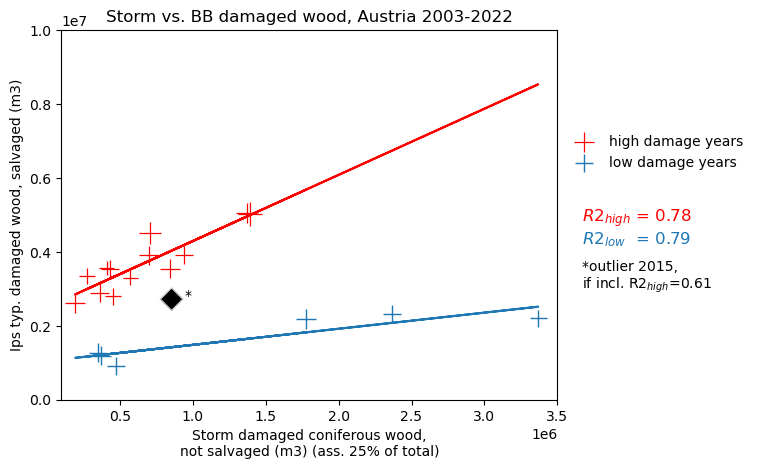

In [682]:
# Storm vs. BB damage REGRESSION

# Create above and below trend line x and y containers parallelly
x = [cut_zeros(storm_dam_left.drop(2015)), cut_zeros(storm_dam_left.drop(2015))]   # x_gd, x_bd
y = cutoff_value(bbeat_dam, 2.5e+6)                                                # y_gd, y_bd

model = create_bisectional_model(x,y)
plot_bisectional_model(model)

# Outlier
sns.scatterplot(x=storm_dam_left.loc[2015], y=bbeat_dam.loc[2015], size=degreedays, sizes=(20,150), color='k', marker='D', label= 'outlier', legend=False)
plt.text(storm_dam_left.loc[2015] + 0.09e+6, bbeat_dam.loc[2015], "*")
plt.annotate("*outlier 2015,\nif incl. R2$_{high}$=0.61", xy=(1.05, 0.30), xycoords='axes fraction', fontsize=10)


plt.title('Storm vs. BB damaged wood, Austria 2003-2022')
plt.xlabel('Storm damaged coniferous wood,\nnot salvaged (m3) (ass. 25% of total)')
plt.ylabel('Ips typ. damaged wood, salvaged (m3)')
plt.xlim(0.1e+6, 3.5e+6)
plt.ylim(0, 1e+7)
#plt.xticks([0.1]+list(np.arange(0.5 *10**6, 4*10**6, 0.5 *10**6)))




Storm damage does correlate strongly for each category "high bark beetle population" and "low bark beetle population". The driver why these two separate is not storm-damaged wood, but something else.

### Outlier Analysis

In [18]:
bb_outliers

Year
2003    2181607.20
2007    2305454.40
2008    2199411.60
2012    1185219.60
2013    1269033.60
2014     913413.03
Name: bb_damage_mean, dtype: float64

In [19]:
storm_outliers

Year
2003    1.777518e+06
2007    2.368593e+06
2008    3.368417e+06
2012    3.736960e+05
2013    3.490443e+05
2014    4.740320e+05
Name: storm_salvage_1, dtype: float64

What else happened during these years?

Where did the damage happen?

How many degree days?

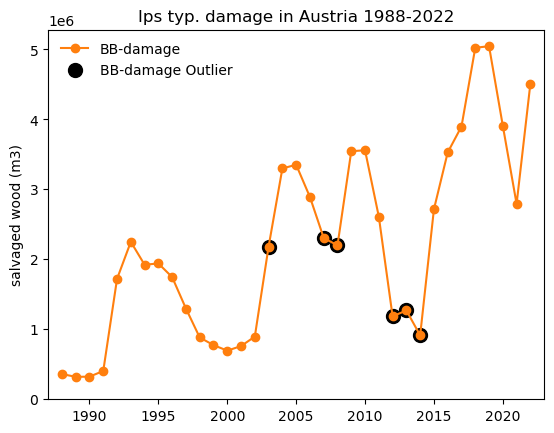

In [96]:
# Bark beetle Damage with Outliers

plt.plot(bbeat_dam, marker='o', label='BB-damage', color=bbcol)
plt.scatter(bb_outliers.index, bbeat_dam.loc[bb_outliers.index].values, color='k', label='BB-damage Outlier', s=100)

plt.title('Ips typ. damage in Austria 1988-2022')
plt.xlim(1987,2023)
plt.ylim(0,)
plt.ylabel('salvaged wood (m3)')
plt.legend(frameon=False)

Text(0, 0.5, 'relevant degreedays, average over Austria')

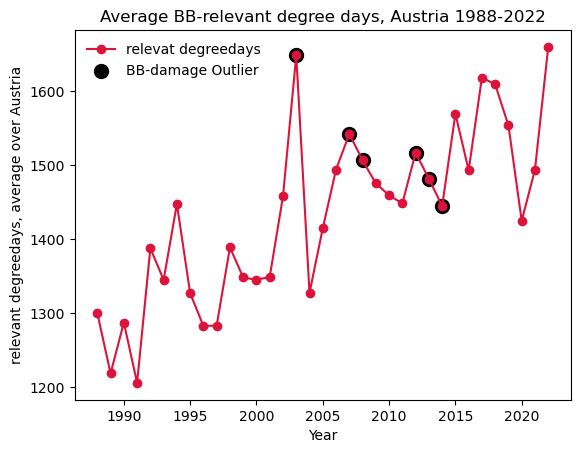

In [97]:
# Relevant Degreedays with Outliers

rel_degreedays.plot(marker='o',label='relevat degreedays', color=tpcol)

plt.scatter(bb_outliers.index, rel_degreedays.loc[bb_outliers.index], color='black', label='BB-damage Outlier', s=100)

plt.title('Average BB-relevant degree days, Austria 1988-2022')
plt.legend(frameon=False)
plt.ylabel('relevant degreedays, average over Austria')

(0.0, 3536837.85)

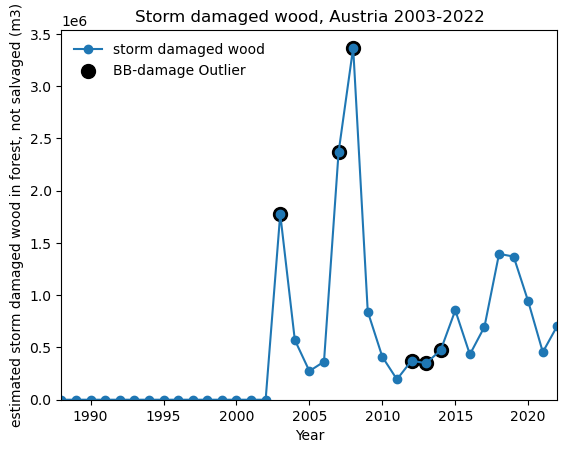

In [98]:
# Storm Damage with Outliers

plt.plot(storm_dam_left, marker='o', label='storm damaged wood')
plt.scatter(bb_outliers.index, storm_dam_left.loc[bb_outliers.index].values, color='k', label='BB-damage Outlier', s=100)

plt.title('Storm damaged wood, Austria 2003-2022')
plt.legend(frameon=False)
plt.xlabel('Year')
plt.xlim(1988,2022)
plt.xticks(np.arange(1990,2023,5))
plt.ylabel('estimated storm damaged wood in forest, not salvaged (m3)')
plt.ylim(0,)



In [ ]:
'Tavg_5', 'Tavg_6','Tavg_7', 'Tavg_8', 
'Tmaxavg_5', 'Tmaxavg_6', 'Tmaxavg_7', 'Tmaxavg_8', 
'Tminavg_5', 'Tminavg_6', 'Tminavg_7','Tminavg_8', 
'Tavg_JJA', 'Tmaxavg_JJA', 'Tminavg_JJA',
       
# This is now confusing... maybe it was TOO hot?

([<matplotlib.axis.YTick at 0x1d842042090>,
 [Text(0, 3, '3'),
  Text(0, 6, '6'),
  Text(0, 9, '9'),
  Text(0, 12, '12'),
  Text(0, 15, '15'),
  Text(0, 18, '18'),
  Text(0, 21, '21')])

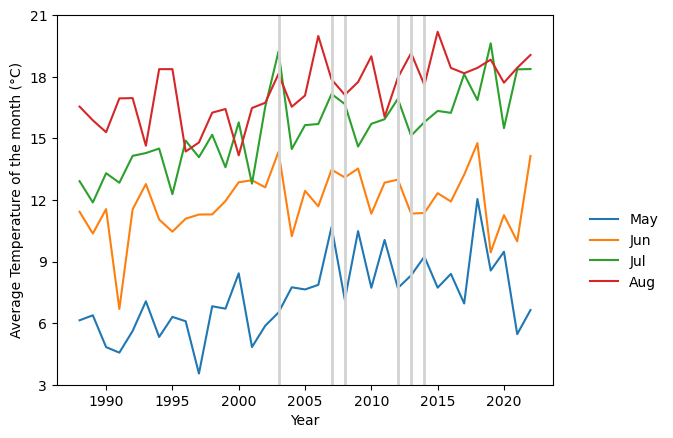

In [99]:
# Plot average temp of the month
tavg_may.plot(label='May')
tavg_jun.plot(label='Jun')
tavg_jul.plot(label='Jul')
tavg_aug.plot(label='Aug')

# Outlier markers
#plt.scatter(bb_outliers.index, tavg_may.loc[bb_outliers.index], color='black', label='BB-damage Outlier', s=100)
#plt.scatter(bb_outliers.index, tavg_jun.loc[bb_outliers.index], color='black', s=100)
#plt.scatter(bb_outliers.index, tavg_jul.loc[bb_outliers.index], color='black', s=100)
#plt.scatter(bb_outliers.index, tavg_aug.loc[bb_outliers.index], color='black', s=100)
plt.vlines(bb_outliers.index, 0,22, color='lightgray', linewidth=2)


plt.legend(frameon=False, bbox_to_anchor=(1.05,0.5))
plt.ylabel('Average Temperature of the month (°C)')
plt.ylim(3,21)
plt.yticks(np.arange(3,24,3))

([<matplotlib.axis.YTick at 0x1d8420d9290>,
 [Text(0, 6, '6'),
  Text(0, 9, '9'),
  Text(0, 12, '12'),
  Text(0, 15, '15'),
  Text(0, 18, '18'),
  Text(0, 21, '21'),
  Text(0, 24, '24')])

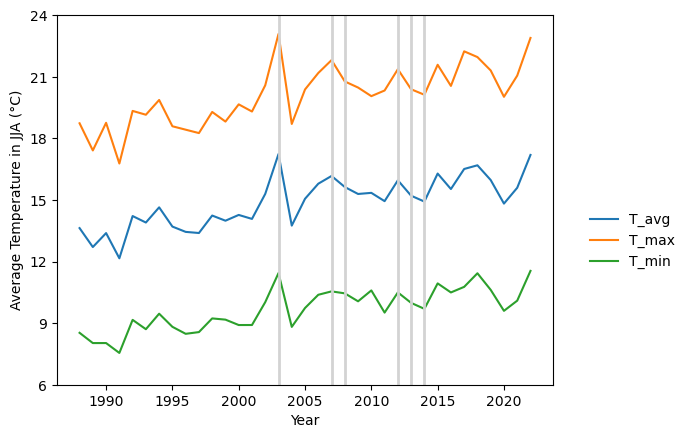

In [100]:
# Average Temperature of the month


# Plot average temp of the month
tavg_jja.plot(label='T_avg')
tmaxavg_jja.plot(label='T_max')
tminavg_jja.plot(label='T_min')


# Outlier markers
#plt.scatter(bb_outliers.index, tavg_may.loc[bb_outliers.index], color='black', label='BB-damage Outlier', s=100)
#plt.scatter(bb_outliers.index, tavg_jun.loc[bb_outliers.index], color='black', s=100)
#plt.scatter(bb_outliers.index, tavg_jul.loc[bb_outliers.index], color='black', s=100)
#plt.scatter(bb_outliers.index, tavg_aug.loc[bb_outliers.index], color='black', s=100)
plt.vlines(bb_outliers.index, 0,30, color='lightgray', linewidth=2)


plt.legend(frameon=False, bbox_to_anchor=(1.05,0.5))
plt.ylabel('Average Temperature in JJA (°C)')
plt.ylim(6,24)
plt.yticks(np.arange(6,27,3))

Die Temperaturen geben mir nicht so viel Aufschluss...

(127.0, 128.0)

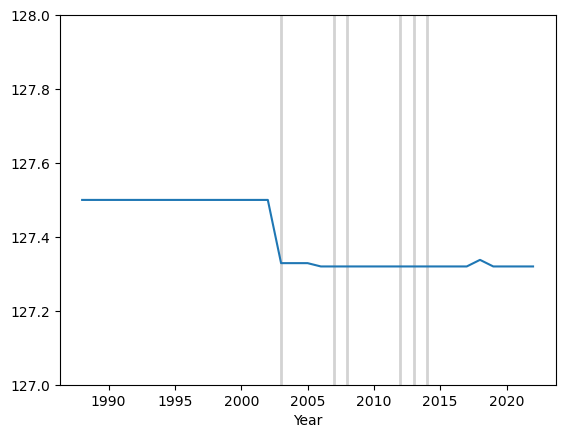

In [101]:
# Season start

plt.vlines(bb_outliers.index, 0,130, color='lightgray', linewidth=2)
aut.groupby('Year').mean('season_start')['season_start'].plot()

plt.ylim(127,128)

Die season length hat anscheinnend einen Sprung gemacht in 2003, das ist interessant, aber so  minimal, dass man nicht wirklich was sagenn kann darueber.

(90.0, 95.0)

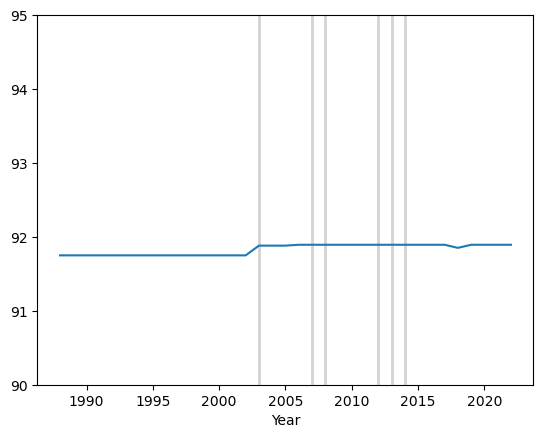

In [102]:
# Season length

plt.vlines(bb_outliers.index, 0,130, color='lightgray', linewidth=2)
aut.groupby('Year').mean('season_length')['season_length'].plot()

plt.ylim(90,95)

Das gleich gilt fuer season length... nicht wirklich etwas zu sehen.
Vielleicht wenn man es sich fuer jeden Bezirk extra ansieht

(85.0, 100.0)

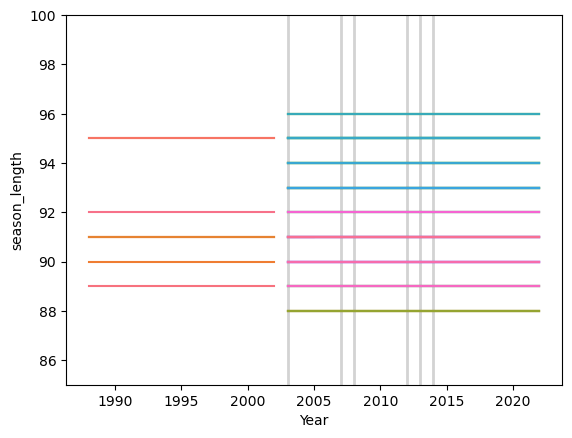

In [103]:
# Season length

plt.vlines(bb_outliers.index, 0,130, color='lightgray', linewidth=2)
sns.lineplot(x=aut.Year, y=aut.season_length , hue=aut.ForestryDistrict, legend=False)
plt.ylim(85,100)

(85.0, 100.0)

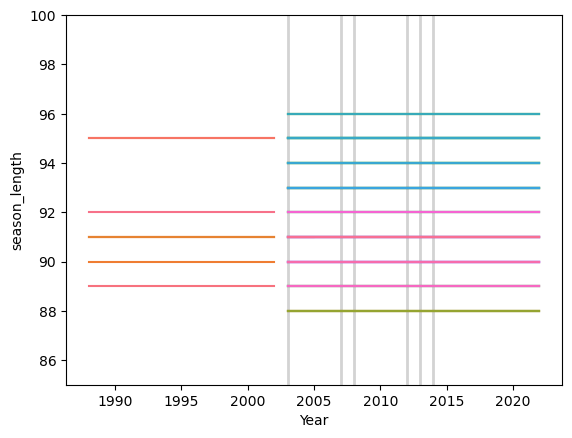

In [104]:
# Season length

plt.vlines(bb_outliers.index, 0,130, color='lightgray', linewidth=2)
sns.lineplot(x=aut.Year, y=aut.season_length , hue=aut.ForestryDistrict, legend=False)
plt.ylim(85,100)

# Regression 2: BB damage & temperatures

In [ ]:
aut.columns

Index(['ForestryDistrict', 'FederalState', 'lat_center', 'lon_center', 'Year',
       'degreedays', 'relevant_degreedays', 'max_generations', 'season_start',
       'season_end', 'season_length', 'frostdays', 'Humavg_5', 'Humavg_6',
       'Humavg_7', 'Humavg_8', 'Humavg_JJA', 'Precipavg_5', 'Precipavg_6',
       'Precipavg_7', 'Precipavg_8', 'Precipavg_JJA', 'Tavg_5', 'Tavg_6',
       'Tavg_7', 'Tavg_8', 'Tavg_JJA', 'Tmaxavg_5', 'Tmaxavg_6', 'Tmaxavg_7',
       'Tmaxavg_8', 'Tmaxavg_JJA', 'Tminavg_5', 'Tminavg_6', 'Tminavg_7',
       'Tminavg_8', 'Tminavg_JJA', 'Windspavg_5', 'Windspavg_6', 'Windspavg_7',
       'Windspavg_8', 'Windspavg_JJA', 'Area', 'DistrictShareAustrForest',
       'DistrictShareStateForest', 'TotalForestShare', 'TotalForestArea',
       'ConiferousShare', 'ConiferousArea', 'ConiferousStock',
       'SpruceShareTotalArea', 'SpruceShareTotalForest', 'SpruceConifShare',
       'SpruceArea', 'SpruceArea2', 'SpruceStockShare', 'SpruceStock',
       'DWStShare', 'DWStS

In [ ]:
# Degreedays 
degreedays
rel_degreedays

# Average temperatures of the month
tavg_may 
tavg_jun 
tavg_jul 
tavg_aug 

tmaxavg_may
tmaxavg_jun
tmaxavg_jul
tmaxavg_aug

tminavg_may
tminavg_jun
tminavg_jul
tminavg_aug

# Average temperature in the summer
tavg_jja    
tmaxavg_jja 
tminavg_jja 

R2 = 0.65
 y = 5004.2*x + -11451217.8


Text(0, 0.5, 'Ips t. related salvage (m3)')

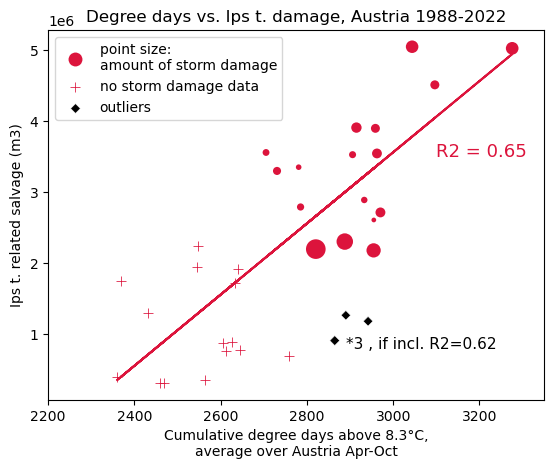

In [628]:
#plt.scatter(degreedays, bbeat_dam, color=outlcol, s=10, label='Outliers', marker="D")

# Make Regression model (time shift irrelevant here, because no time dimension included)
#y = bbeat_dam
#x = degreedays
y = bbeat_dam.loc[~bbeat_dam.index.isin([2012,2013,2014])]
x = degreedays.loc[y.index]

nodat = storm_dam_left.loc[storm_dam_left.values==0]

model   = np.polyfit(x, y, 1)
predict = np.poly1d(model)

# Plot All Data  
sns.scatterplot(x=x, y=y, size=storm_dam_left, sizes=(0,200), color=tpcol,
                label= 'point size:\namount of storm damage', legend=False)

# Plot data without storm damage data extra
sns.scatterplot(x=degreedays, y=y.loc[nodat.index], marker='+', s=50, color=tpcol,
                label='no storm damage data', legend=False)

# Plot outliers extra
sns.scatterplot(x=degreedays.loc[[2012,2013,2014]], y=bb_outliers.loc[[2012,2013,2014]], 
                size=storm_dam_left, marker='D', color='k',
                label= 'outliers', legend=False)

# Plot regression line
plt.plot(x, predict(x), color=tpcol)

# Display R2 and equation
print(f"R2 = {r2_score(y, predict(x)):.2f}")
print(f" y = {model[0]:.1f}*x + {model[1]:.1f}")
plt.text(3100, 3.5e+6, f"R2 = {r2_score(y, predict(x)):.2f}", color=tpcol, fontsize=13)

# Display outlier comments
#plt.text(degreedays.loc[[2003]].values, bb_outliers.loc[[2003]].values-0.08 *10**7 , "*1", color=tpcol, fontsize=11)
#plt.text(degreedays.loc[[2007]].values, bb_outliers.loc[[2007]].values-0.08 *10**7 , "*2", color=tpcol, fontsize=11)
#plt.text(degreedays.loc[[2008]].values, bb_outliers.loc[[2008]].values-0.08 *10**7 , "*2", color=tpcol, fontsize=11)
plt.text(2890, 0.8e+6, "*3 , if incl. R2=0.62", color='k', fontsize=11)

plt.title('Degree days vs. Ips t. damage, Austria 1988-2022')
plt.legend()
plt.xlabel('Cumulative degree days above 8.3°C,\naverage over Austria Apr-Oct')
plt.xlim(2200,3350)
#plt.ylim(0 ,1.1 *10**7)
plt.ylabel('Ips t. related salvage (m3)')


R2 = 0.43
 y = 726059.7*x + -8604997.7


Text(0, 0.5, 'Ips typ. damaged timber, salvaged (m$^3$)')

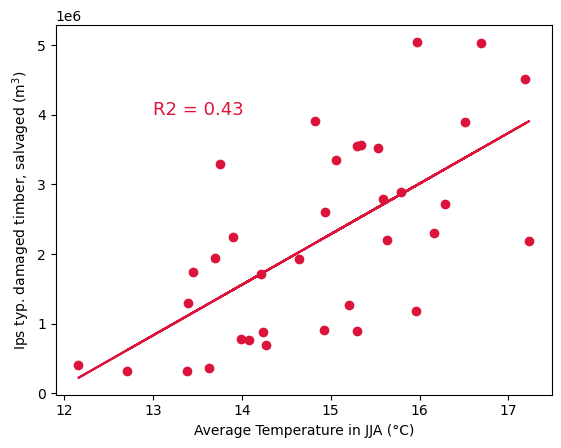

In [686]:
# Average temperature

plt.scatter(tavg_jja, bbeat_dam, color=outlcol, s=10, label='Outliers', marker="D")

# Make Regression model (time shift irrelevant here, because no time dimension included)
x = tavg_jja
y = bbeat_dam.loc[x.index]

model   = np.polyfit(x, y, 1)
predict = np.poly1d(model)

# Plot Inliers and plot them on top of all data points + plot regression line
plt.scatter(x,y, label= 'Consiered Values', color=tpcol)
plt.plot(x, predict(x), color=tpcol)

# Display R2 and equation
r2 = r2_score(y, predict(x))
print(f"R2 = {r2:.2f}")
print(f" y = {model[0]:.1f}*x + {model[1]:.1f}")
plt.text(13, 0.4 *10**7, f"R2 = {r2:.2f}", color=tpcol, fontsize=13)

plt.xlabel('Average Temperature in JJA (°C)')
plt.ylabel('Ips typ. damaged timber, salvaged (m$^3$)')

R2_gd = 0.49
R2_bd = 0.40
 y_gd = 461506.0*x_gd + -3239820.8
 y_bd = 439728.2*x_bd + -4921272.9


(0.0, 6000000.0)

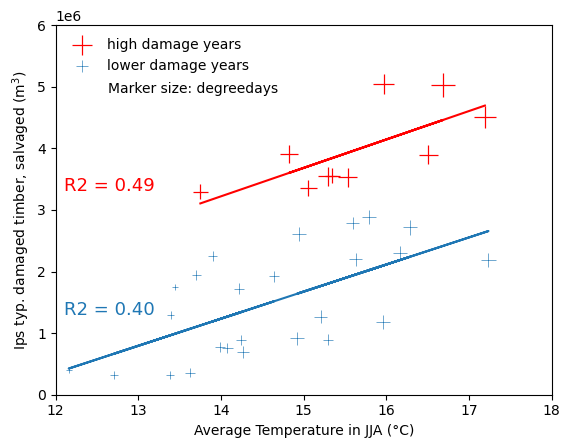

In [687]:
# Temp vs. BB damage REGRESSION
mixcol = stcol
outlcol = 'crimson'


# Make Regression model (time shift irrelevant here, because no time dimension included)

y_gd = bbeat_dam.loc[bbeat_dam.values > 3e+06]
x_gd = tavg_jja.loc[y_gd.index]
model_gd   = np.polyfit(x_gd, y_gd, 1)
predict_gd = np.poly1d(model_gd)

y_bd = bbeat_dam.loc[bbeat_dam.values < 3e+06]
x_bd = tavg_jja.loc[y_bd.index]
model_bd   = np.polyfit(x_bd, y_bd, 1)
predict_bd = np.poly1d(model_bd)



# Plot All Data  
sns.scatterplot(x=x_gd, y=y_gd, size=degreedays, sizes=(0,300), color='r', marker='+',
                label= 'high damage years', legend=False)
sns.scatterplot(x=x_bd, y=y_bd, size=degreedays, sizes=(20,150), color=stcol, marker='+',
                label= 'lower damage years', legend=False)

plt.plot(x_gd, predict_gd(x_gd), color='r')
plt.plot(x_bd, predict_bd(x_bd), color=mixcol)


# Display R2 and equation
R2_gd = r2_score(y_gd, predict_gd(x_gd))
R2_bd = r2_score(y_bd, predict_bd(x_bd))
print(f"R2_gd = {R2_gd:.2f}")
print(f"R2_bd = {R2_bd:.2f}")
print(f" y_gd = {model_gd[0]:.1f}*x_gd + {model_gd[1]:.1f}")
print(f" y_bd = {model_bd[0]:.1f}*x_bd + {model_bd[1]:.1f}")
plt.text(12.1, 3.3e+6, f"R2 = {R2_gd:.2f}", color='r', fontsize=13)
plt.text(12.1, 1.3e+6, f"R2 = {R2_bd:.2f}", color=stcol, fontsize=13)
#plt.text(1.8* 10**6, 7500000, f"  y = {model[0]:.1f}*x {model[1]:.1f}", color='tab:blue', fontsize=12)


plt.legend(frameon=False, loc='upper left')
plt.text(12.63, 4.9e+6, "Marker size: degreedays")
plt.xlabel('Average Temperature in JJA (°C)')
plt.ylabel('Ips typ. damaged timber, salvaged (m$^3$)')
plt.xlim(12, 18)
#plt.xticks([0.1]+list(np.arange(0.5 *10**6, 4*10**6, 0.5 *10**6)))

plt.ylim(0, 6e+6)


R2_gd = 0.31
R2_bd = 0.56
 y_gd = 524409.5*x_gd + -4814775.0
 y_bd = 542219.5*x_bd + -6625517.7


(11.5, 18.0)

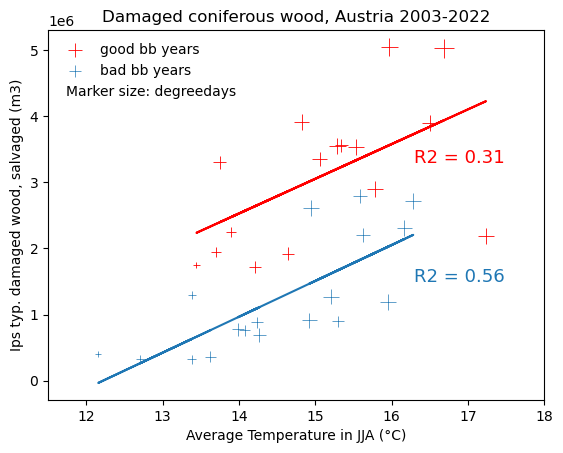

In [670]:
# Temp vs. BB damage REGRESSION
mixcol = stcol
outlcol = 'crimson'


# Make Regression model (time shift irrelevant here, because no time dimension included)

y_gd = bbeat_dam.loc[bb_goodyrs]
x_gd = tavg_jja.loc[bb_goodyrs]
model_gd   = np.polyfit(x_gd, y_gd, 1)
predict_gd = np.poly1d(model_gd)

y_bd = bbeat_dam.loc[bb_badyrs]
x_bd = tavg_jja.loc[bb_badyrs]
model_bd   = np.polyfit(x_bd, y_bd, 1)
predict_bd = np.poly1d(model_bd)



# Plot All Data  
sns.scatterplot(x=x_gd, y=y_gd, size=degreedays, sizes=(20,200), color='r', marker='+',
                label= 'good bb years', legend=False)
sns.scatterplot(x=x_bd, y=y_bd, size=degreedays, sizes=(20,200), color=stcol, marker='+',
                label= 'bad bb years', legend=False)

plt.plot(x_gd, predict_gd(x_gd), color='r')
plt.plot(x_bd, predict_bd(x_bd), color=mixcol)


# Display R2 and equation
R2_gd = r2_score(y_gd, predict_gd(x_gd))
R2_bd = r2_score(y_bd, predict_bd(x_bd))
print(f"R2_gd = {R2_gd:.2f}")
print(f"R2_bd = {R2_bd:.2f}")
print(f" y_gd = {model_gd[0]:.1f}*x_gd + {model_gd[1]:.1f}")
print(f" y_bd = {model_bd[0]:.1f}*x_bd + {model_bd[1]:.1f}")
plt.text(16.3, 3.3e+6, f"R2 = {R2_gd:.2f}", color='r', fontsize=13)
plt.text(16.3, 1.5e+06, f"R2 = {R2_bd:.2f}", color=stcol, fontsize=13)
#plt.text(1.8* 10**6, 7500000, f"  y = {model[0]:.1f}*x {model[1]:.1f}", color='tab:blue', fontsize=12)



plt.title('Damaged coniferous wood, Austria 2003-2022')
plt.legend(frameon=False, loc='upper left')
plt.text(11.73, 4.3e+6, "Marker size: degreedays")
plt.xlabel('Average Temperature in JJA (°C)')
plt.ylabel('Ips typ. damaged wood, salvaged (m3)')
plt.xlim(11.5, 18)
#plt.ylim(0, 1.2e+7)
#plt.xticks([0.1]+list(np.arange(0.5 *10**6, 4*10**6, 0.5 *10**6)))

In [ ]:
# Storm vs. BB damage REGRESSION

mixcol = stcol
outlcol = 'crimson'

# Plot all data points (WITH Outliers)
plt.scatter(storm_dam_left, bbeat_dam, color=outlcol, s=10, label='Outliers', marker="D")

# Make Regression model (time shift irrelevant here, because no time dimension included)
y = bbeat_dam_outl
x = storm_dam_left_outl.loc[bbeat_dam_outl.index]
model   = np.polyfit(x, y, 1)
predict = np.poly1d(model)

# Plot Inliers and plot them on top of all data points + plot regression line
plt.scatter(x,y, label= 'Consiered Values', color=mixcol)
plt.plot(x, predict(x), color=mixcol)

# Display R2 and equation
print(f"R2 = {r2_score(y, predict(x)):.2f}")
print(f" y = {model[0]:.1f}*x + {model[1]:.1f}")
plt.text(1.25 *10**6, 4.25 *10**6, f"R2 = {r2_score(y, predict(x)):.2f}", color=mixcol, fontsize=12)
#plt.text(1.8* 10**6, 7500000, f"  y = {model[0]:.1f}*x {model[1]:.1f}", color='tab:blue', fontsize=12)



# Outlier descriptors
for ind in bb_outliers.index:      #  bb_outliers[bb_outliers.values > 4*10**6]
    if ind==2003:
        plt.text(storm_dam_left[ind] , bbeat_dam[ind], "*1", color=outlcol, fontsize=12)
    elif ind>2012:
        plt.text(storm_dam_left[ind] , bbeat_dam[ind], "*3", color=outlcol, fontsize=12)
    elif ind==2012:
        pass
    else:
        plt.text(storm_dam_left[ind] , bbeat_dam[ind], "*2", color=outlcol, fontsize=12)
        


plt.title('Damaged coniferous wood, Austria 2003-2022')
plt.legend(frameon=True, loc='upper right')
plt.xlabel('Storm damaged coniferous wood,\nnot salvaged (m3) (ass. 25% of total)')
plt.ylabel('Ips typ. damaged wood, salvaged (m3)')
#plt.ylim(0, 0.5*10**6)


# More Plots

(0.0, 250000.0)

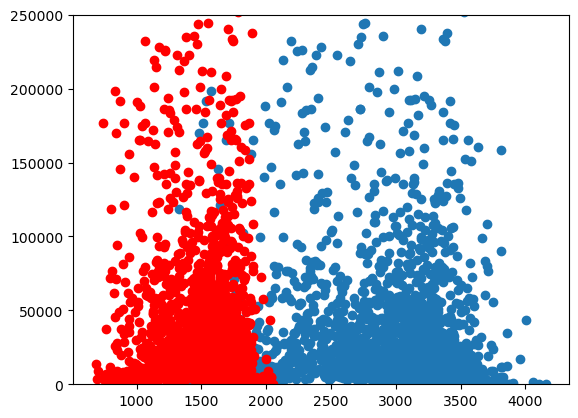

In [ ]:
plt.scatter(x=aut.degreedays, y=aut.bb_damage_mean)
plt.scatter(x=aut.relevant_degreedays, y=aut.bb_damage_mean, color='red')
plt.ylim(0,250000)  # BL damage at 250.000?

(250000.0, 2717316.0)

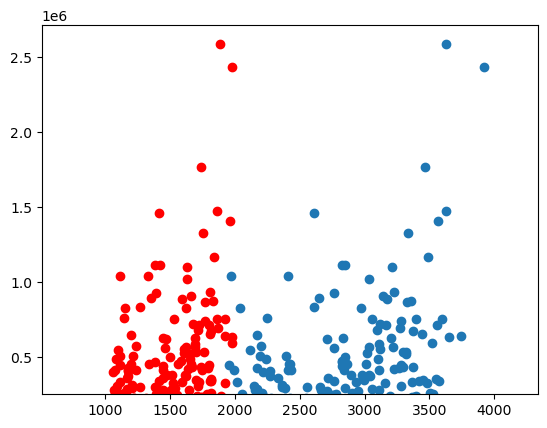

In [ ]:
plt.scatter(x=aut.degreedays, y=aut.bb_damage_mean)
plt.scatter(x=aut.relevant_degreedays, y=aut.bb_damage_mean, color='red')
plt.ylim(250000,)  # BL damage at 250.000?

(250000.0, 2717316.0)

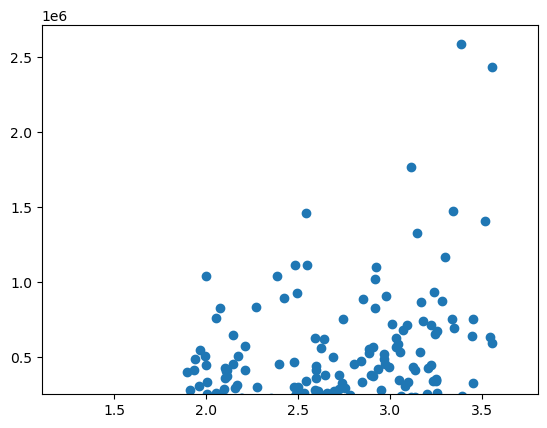

In [ ]:
plt.scatter(x=aut.max_generations, y=aut.bb_damage_mean)
plt.ylim(250000,)


(250000.0, 2717316.0)

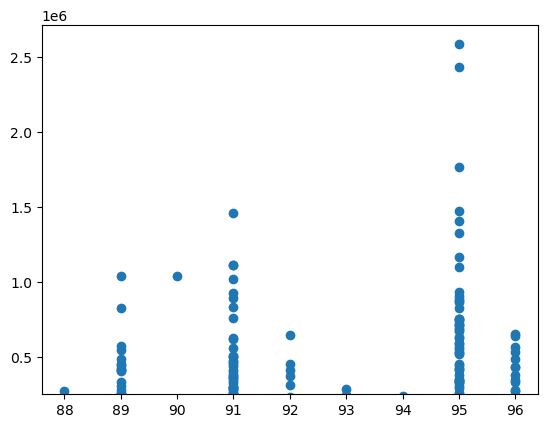

In [ ]:
plt.scatter(x=aut.season_length, y=aut.bb_damage_mean)
plt.ylim(250000,)

# Summary

Climate change and its impacts on Austrian forests with regards to spruce bark beetle populations could clearly be observed for Austria in the past three decades in the dataset created during this project. 


More than half of Austrian's forests consist of coniferous trees. The concentration of spruce within the forest has been historically high in Austria. Between 2009 and 2020, the share of spruce has even been increased, but stagnates since. The highest share of total federal area covered by spruce is found in Carinthia and Styria (more than 30%). The lowest spruce cover can be found in Burgenland (around 5%). The trend for average precipitation, average wind speed and storm-damaged salvage timber has been observed to decrease slightly in Austria since the 1990s. With strongly rising summer and winter temperatures in Austria, spruce bark beetle damages have been increasing more than 4-fold since the 1990s. 

Spruce bark beetle damages have broken records again and again over the past three decades. Austria-wide records were broken in 2004-2005, then again in 2009-2010, and lately in 2018-2019. The worst affected federal states for these outbreak peak years were Salzburg, Upper Austria and Styria, and Lower Austria and Upper Austria. Upper and Lower Austria are at the same time the two states with the longest average breeding season (derived from average climate and daylight hours).


Moderate to moderately strong correlations exist between temperature averages, storm damaged wood and the amount of spruce bark beetle damage in Austria. More correlations are probable to exist, but due to time constraints, could not be further investigated during this project.
